In [98]:
#importing all required packages
import random
from time import perf_counter
import matplotlib.pyplot as plt
import networkx as nx
import math
import unittest

# Part 1

Creates a list of integers with values in decending order

In [99]:
reversed_ls = []
for i in range(500):
    reversed_ls.append(i)
reversed_ls.reverse()

print(reversed_ls)

[499, 498, 497, 496, 495, 494, 493, 492, 491, 490, 489, 488, 487, 486, 485, 484, 483, 482, 481, 480, 479, 478, 477, 476, 475, 474, 473, 472, 471, 470, 469, 468, 467, 466, 465, 464, 463, 462, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 451, 450, 449, 448, 447, 446, 445, 444, 443, 442, 441, 440, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416, 415, 414, 413, 412, 411, 410, 409, 408, 407, 406, 405, 404, 403, 402, 401, 400, 399, 398, 397, 396, 395, 394, 393, 392, 391, 390, 389, 388, 387, 386, 385, 384, 383, 382, 381, 380, 379, 378, 377, 376, 375, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 361, 360, 359, 358, 357, 356, 355, 354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 342, 341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300,

Creates a list of integers that are almost sorted

In [100]:
#creates a list of integers in ascending order
nearly_sorted_ls = list(range(500))
for i in range(500):
    # swap pairs of elements with probability of 0.1
    if random.random() < 0.1:
        # generates a nearly sorted array where each element is at most k positions away from its sorted position
        j = random.randint(0, 499)
        nearly_sorted_ls[i], nearly_sorted_ls[j] = nearly_sorted_ls[j], nearly_sorted_ls[i]

print(nearly_sorted_ls)

[280, 1, 2, 273, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 485, 227, 17, 95, 19, 132, 21, 22, 23, 24, 234, 26, 27, 223, 29, 30, 31, 32, 33, 299, 35, 36, 37, 38, 274, 40, 41, 42, 212, 44, 45, 448, 47, 48, 49, 50, 51, 349, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 387, 69, 70, 401, 72, 73, 74, 437, 76, 77, 196, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 135, 91, 92, 93, 242, 18, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 373, 122, 123, 124, 125, 126, 127, 128, 129, 130, 181, 20, 133, 134, 90, 136, 180, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 475, 159, 260, 161, 285, 163, 164, 165, 166, 167, 168, 282, 170, 171, 172, 173, 174, 175, 176, 177, 178, 322, 137, 131, 182, 183, 184, 185, 355, 187, 188, 189, 190, 191, 192, 193, 194, 195, 78, 197, 300, 199, 379, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 43, 213, 214, 215, 216, 217, 218

### Bubble Sort Algorithm

In [101]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            # swaps elements based on comparison-exchange between consectutive numbers
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

### Quick Sort Algorithm

In [102]:
def partition(arr, low, high):
    # selects last element of the array as the pivot
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    # returns a pivot element for quick sort function
    return pivot

# iterative quick sort algorithm
def quick_sort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quick_sort(arr, low, pivot-1)
        quick_sort(arr, pivot+1, high)

### Merge Sort Algorithm

In [103]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    # iterative merging of two lists
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = merge_sort(left)
    right = merge_sort(right)
    return list(merge(left, right))

### Heap Sort Algorithm

In [104]:
# Ref: https://www.geeksforgeeks.org/heap-sort/

# heapify subtree rooted at index i
def heapify(arr, N, i):
	largest = i 
	l = 2 * i + 1
	r = 2 * i + 2

	# checks if left child of root exists and is greater than root
	if l < N and arr[largest] < arr[l]:
		largest = l

	# checks if right child of root exists and is greater than root
	if r < N and arr[largest] < arr[r]:
		largest = r

	# swap root if the largest doesn't equal i
	if largest != i:
		arr[i], arr[largest] = arr[largest], arr[i]

		# Heapify the root
		heapify(arr, N, largest)

# heap sort algoriithm
def heap_sort(arr):
	N = len(arr)

	# build a maxheap
	for i in range(N//2 - 1, -1, -1):
		heapify(arr, N, i)

	# extract elements one by one
	for i in range(N-1, 0, -1):
		arr[i], arr[0] = arr[0], arr[i]
		heapify(arr, i, 0)


### Selection Sort Algorithm

In [105]:
# Ref: https://www.geeksforgeeks.org/selection-sort/

def selection_sort(arr):
# Traverse through all array elements
    for i in range(len(arr)):
        
        # get minimum element in remaining unsorted array
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
                
        # swap minimum element with the first unsorted element
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

Initalising dictionaries to hold values and the number of runs to get an average time

In [106]:
# dictionary of times for list size against time values
bubble_time = {}
quick_time = {}
merge_time = {}
heap_time = {}
selection_time = {}

# number of runs to get average time to reduce noise
num_runs = 5

In [107]:
# Calculates average time for num_runs
def avg_time(ls):
    return sum(ls) / len(ls)

Function for using sorting algorithms

In [108]:
def sorting_algoritims(search_ls):
    # start with the full length of the search array and exit loop when length is equal to 1
    while len(search_ls) != 1:
        bubble_time_ls = []
        #used to find the average value of num_runs for each value of num to reduce noise
        for i in range(num_runs):
            start_timer = perf_counter()
            bubble_sort(search_ls)
            bubble_time_ls.append(perf_counter() - start_timer)
        bubble_time[len(search_ls)] = avg_time(bubble_time_ls)

        quick_time_ls = []
        #used to find the average value of num_runs for each value of num to reduce noise
        for i in range(num_runs):
            start_timer = perf_counter()
            quick_sort(search_ls)
            quick_time_ls.append(perf_counter() - start_timer)
        quick_time[len(search_ls)] = avg_time(quick_time_ls)

        merge_time_ls = []
        #used to find the average value of num_runs for each value of num to reduce noise
        for i in range(num_runs):
            start_timer = perf_counter()
            merge_sort(search_ls)
            merge_time_ls.append(perf_counter() - start_timer)
        merge_time[len(search_ls)] = avg_time(merge_time_ls)


        heap_time_ls = []
        #used to find the average value of num_runs for each value of num to reduce noise
        for i in range(num_runs):
            start_timer = perf_counter()
            heap_sort(search_ls)
            heap_time_ls.append(perf_counter() - start_timer)
        heap_time[len(search_ls)] = avg_time(heap_time_ls)

        selection_time_ls = []
        #used to find the average value of num_runs for each value of num to reduce noise
        for i in range(num_runs):
            start_timer = perf_counter()
            selection_sort(search_ls)
            selection_time_ls.append(perf_counter() - start_timer)
        selection_time[len(search_ls)] = avg_time(selection_time_ls)

        # remove the last element of the list
        search_ls.pop()

Use the sorting_algorithm function for the reversed list and plot the results

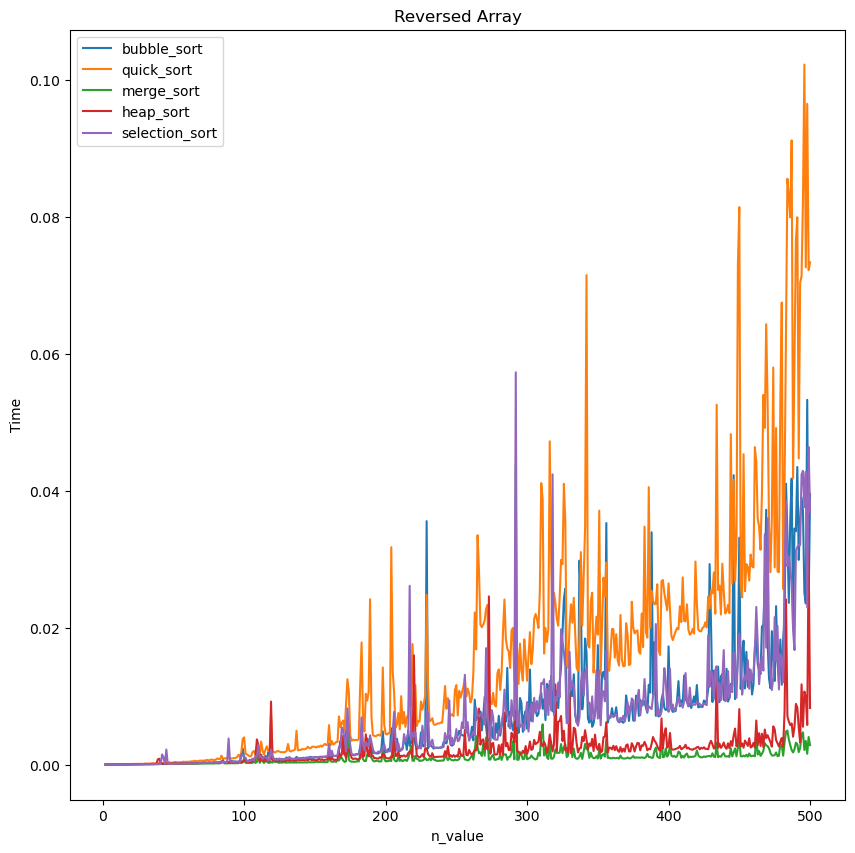

In [109]:
# using all sorting_algorithms for the reversed list
sorting_algoritims(reversed_ls)

# plots the results
plt.figure(figsize=(10,10))
plt.plot(list(bubble_time.keys()), list(bubble_time.values()), label="bubble_sort")
plt.plot(list(quick_time.keys()), list(quick_time.values()), label="quick_sort")
plt.plot(list(merge_time.keys()), list(merge_time.values()), label="merge_sort")
plt.plot(list(heap_time.keys()), list(heap_time.values()), label="heap_sort")
plt.plot(list(selection_time.keys()), list(selection_time.values()), label="selection_sort")
plt.ylabel("Time")
plt.xlabel("n_value")
plt.title("Reversed Array")
plt.legend()
plt.savefig('reversed_array.png')
plt.show()

### Image of Reversed Array Chart

![Reversed Array Chart](reversed_array.png)

Clear the dictionary values for the next sorting algorithm

In [110]:
bubble_time.clear()
quick_time.clear()
merge_time.clear()
heap_time.clear()
selection_time.clear()

Use the sorting_algorithm function for the nearly sorted list and plot the results

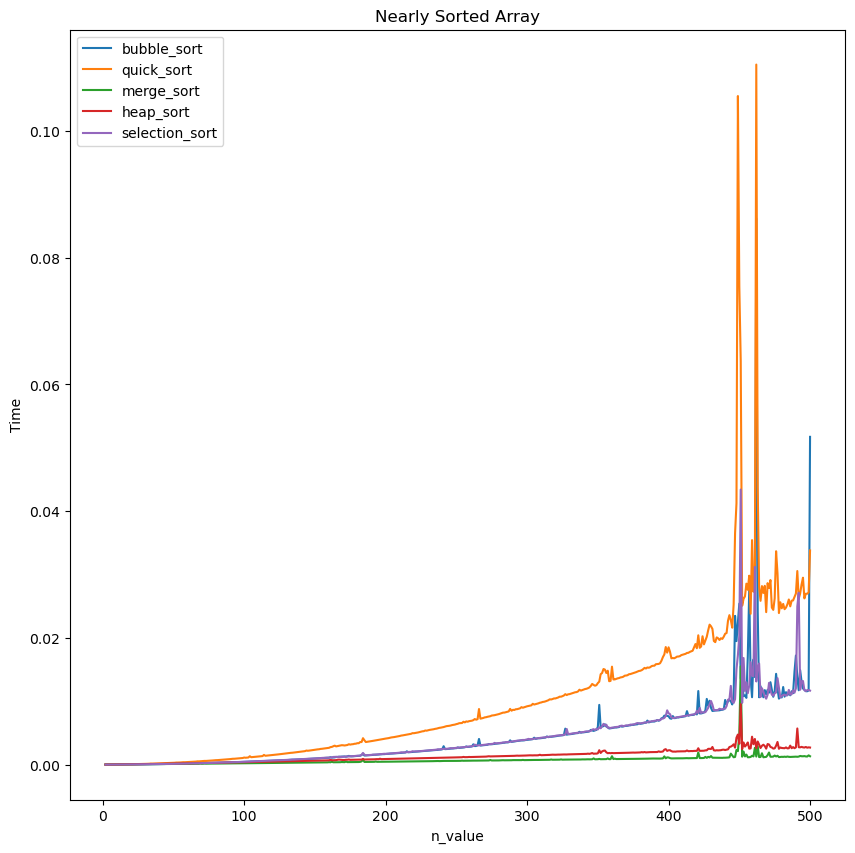

In [111]:
# using all sorting_algorithms for the nearly sorted list
sorting_algoritims(nearly_sorted_ls)

# plots the results
plt.figure(figsize=(10,10))
plt.plot(list(bubble_time.keys()), list(bubble_time.values()), label="bubble_sort")
plt.plot(list(quick_time.keys()), list(quick_time.values()), label="quick_sort")
plt.plot(list(merge_time.keys()), list(merge_time.values()), label="merge_sort")
plt.plot(list(heap_time.keys()), list(heap_time.values()), label="heap_sort")
plt.plot(list(selection_time.keys()), list(selection_time.values()), label="selection_sort")
plt.ylabel("Time")
plt.xlabel("n_value")
plt.title("Nearly Sorted Array")
plt.legend()
plt.savefig('nearly_sorted_array.png')
plt.show()

### Image of Nearly Sorted Array Chart

![Nearly Sorted Array Chart](nearly_sorted_array.png)

## Results & Conclusions
### Reversed List
* Bubble Sort - Complexity of O(n^2) as this is the worst case scenario, every element has to be compared to every other element in the list
* Quick Sort - Complexity of O(n\*logn) in the average case, and O(n^2) in the worst case which is what is likely, given the chart above. This likely means the close to the worst pivot was picked the majoirty of the time
* Merge Sort - Complexity of O(n\*logn) in all cases, the algorithm divides in the list in two halfs making it O(logn) and then combining the lists is O(n) which gives a result of O(n\*longn). This includes the worst case of the list in descending order which can be seen in the chart
* Heap Sort - Complexity of O(n\*longn) in all cases, in the first phase the list is converted into a max heap and in the second phase the highest element is removed, the tree root. The remaining elements are used to create a new max heap until all the elements that have been removed, the removed elements are sorted. Merge sort is slightly faster than Heap sort but merge sort takes extra memory.
* Selection Sort - Complexity of O(n^2) as this is the worst case scenario, every element has to be moved from one end the list to the other end. It takes the same time as Bubble Sort

### Nearly Sorted List
The Big-O complexity for the nearly sorted list is the same as the reversed list for each of the algorithms. However, the actual sorting time should be less as the nearly sorted list is comparatively better than the worst case scneario of the completely reversed list for Bubble Sort, Quick Sort and Selection Sort. It makes a smaller difference for Merge Sort and Heap Sort in terms of total time as they have a complexity of O(n\*logn) for all cases

## Unit Tests

In [112]:
# creates a class of test functions to test that all the functions in the file work as expected
class TestSortingFunctions(unittest.TestCase):

    # tests bubble sort function
    def test_bubble_sort(self):
        input_param = [5, 4, 3, 2, 1]
        expected_output = [1, 2, 3, 4, 5]
        bubble_sort_output = bubble_sort(input_param)

        self.assertEqual(bubble_sort_output, expected_output)

    # tests quick sort function
    def test_quick_sort(self):
        input_param = [5, 4, 3, 2, 1]
        expected_output = [1, 2, 3, 4, 5]
        quick_sort(input_param)

        self.assertEqual(input_param, expected_output)

    # tests merge sort function
    def test_merge_sort(self):
        input_param = [5, 4, 3, 2, 1]
        expected_output = [1, 2, 3, 4, 5]
        merge_sort_output = merge_sort(input_param)

        self.assertEqual(merge_sort_output, expected_output)

    # tests heap sort function
    def test_heap_sort(self):
        input_param = [5, 4, 3, 2, 1]
        expected_output = [1, 2, 3, 4, 5]
        heap_sort(input_param)

        self.assertEqual(input_param, expected_output)

    # tests selection sort function
    def test_selection_sort(self):
        input_param = [5, 4, 3, 2, 1]
        expected_output = [1, 2, 3, 4, 5]
        selection_sort(input_param)

        self.assertEqual(input_param, expected_output)

# loads the test functions and runs them using the module unittest
sorting_test_suite = unittest.TestLoader().loadTestsFromTestCase(TestSortingFunctions)
unittest.TextTestRunner().run(sorting_test_suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

# Part 2

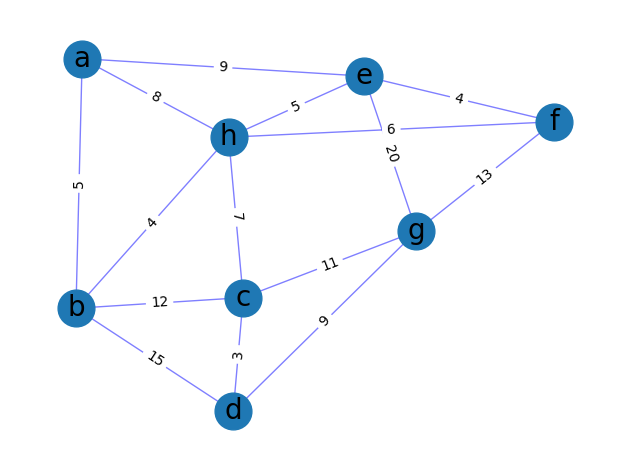

In [113]:
G = nx.Graph()
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')
G.add_node('e')
G.add_node('f')
G.add_node('g')
G.add_node('h')

G.add_edge('a', 'b', weight='5')
G.add_edge('a', 'e', weight='9')
G.add_edge('a', 'h', weight='8')
G.add_edge('b', 'd', weight='15')
G.add_edge('b', 'c', weight='12')
G.add_edge('b', 'h', weight='4')
G.add_edge('c', 'd', weight='3')
G.add_edge('c', 'h', weight='7')
G.add_edge('c', 'g', weight='11')
G.add_edge('d', 'g', weight='9')
G.add_edge('e', 'h', weight='5')
G.add_edge('e', 'f', weight='4')
G.add_edge('e', 'g', weight='20')
G.add_edge('f', 'g', weight='13')
G.add_edge('f', 'h', weight='6')

pos = nx.spring_layout(G, seed=1)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="b")

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [114]:
def dijkstra(graph, start):
    # initializations
    S = set()

    # delta represents the length shortest distance paths from start -> v, for v in delta.
    # We initialize it so that every vertex has a path of infinity
    delta = dict.fromkeys(list(graph.nodes), math.inf)
    previous = dict.fromkeys(list(graph.nodes), None)

    # then we set the path length of the start vertex to 0
    delta[start] = 0

    # while there exists a vertex v not in S
    while S != graph.nodes:
        # let v be the closest vertex that has not been visited...it will begin at 'start'
        v = min((set(delta.keys()) - S), key=delta.get)
        
        print(graph.edges())
        print(graph.edges([v]))

        # for each neighbor of v not in S
        for neighbor in set(graph.edges([v])) - S:
            new_path = delta[v] + graph.weights([v,neighbor])

            # is the new path from neighbor through
            if new_path < delta[neighbor]:
                # since it's optimal, update the shortest path for neighbor
                delta[neighbor] = new_path

                # set the previous vertex of neighbor to v
                previous[neighbor] = v
        S.add(v)

    print(delta, previous)
    return (delta, previous)
 
 
 
def shortest_path(graph, start, end):
    '''Uses dijkstra function in order to output the shortest path from start to end
    '''
    delta, previous = dijkstra(graph, start)

    path = []
    vertex = end

    while vertex is not None:
        path.append(vertex)
        vertex = previous[vertex]

    path.reverse()
    return path

In [115]:
print(shortest_path(G, 'a', 'g'))

[('a', 'b'), ('a', 'e'), ('a', 'h'), ('b', 'd'), ('b', 'c'), ('b', 'h'), ('c', 'd'), ('c', 'h'), ('c', 'g'), ('d', 'g'), ('e', 'h'), ('e', 'f'), ('e', 'g'), ('f', 'g'), ('f', 'h')]
[('a', 'b'), ('a', 'e'), ('a', 'h')]


AttributeError: 'Graph' object has no attribute 'weights'